<a href="https://colab.research.google.com/github/geworgia/ML_challenge/blob/main/studentPerformanceCEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### data source: UCI (DOI: 10.24432/C58D0H)
### initial format: arff
### Common Entrance Examination (CEE)

In [24]:
import pandas as pd
from scipy.io import arff

file_path = "/content/stuPer.arff"
data, meta = arff.loadarff(file_path)

df = pd.DataFrame(data)

for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode("utf-8")

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# EDA

In [26]:
df.head(10)

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE
5,Excellent,male,General,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE
6,Excellent,female,General,OA,ONE,CBSE,CBSE,ENGLISH,Excellent,Excellent,DOCTOR,DOCTOR
7,Excellent,male,OBC,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
8,Excellent,female,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
9,Excellent,female,General,OA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE


In [27]:
df.nunique()

,0
Performance,4
Gender,2
Caste,4
coaching,3
time,6
Class_ten_education,3
twelve_education,3
medium,3
Class_ X_Percentage,4
Class_XII_Percentage,4


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Performance           666 non-null    object
 1   Gender                666 non-null    object
 2   Caste                 666 non-null    object
 3   coaching              666 non-null    object
 4   time                  666 non-null    object
 5   Class_ten_education   666 non-null    object
 6   twelve_education      666 non-null    object
 7   medium                666 non-null    object
 8   Class_ X_Percentage   666 non-null    object
 9   Class_XII_Percentage  666 non-null    object
 10  Father_occupation     666 non-null    object
 11  Mother_occupation     666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


In [29]:
df.describe()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
count,666,666,666,666,666,666,666,666,666,666,666,666
unique,4,2,4,3,6,3,3,3,4,4,8,9
top,Good,male,General,WA,TWO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
freq,210,355,329,449,368,396,368,536,511,398,277,442


In [30]:
df.isnull().sum()

,0
Performance,0
Gender,0
Caste,0
coaching,0
time,0
Class_ten_education,0
twelve_education,0
medium,0
Class_ X_Percentage,0
Class_XII_Percentage,0


In [31]:
df.columns

Index(['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'],
      dtype='object')

<ipython-input-32-52ae009b8e5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Performance", order=df["Performance"].value_counts().index, palette="viridis")


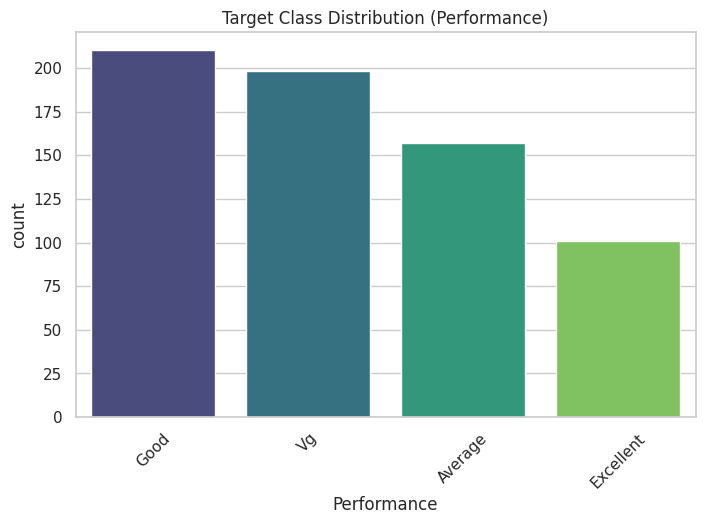

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Performance", order=df["Performance"].value_counts().index, palette="viridis")
plt.title("Target Class Distribution (Performance)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-33-7f130d1964a1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette=pastel_palette)
<ipython-input-33-7f130d1964a1>:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x=col, data=df, ax=axes[i], palette=pastel_palette)
<ipython-input-33-7f130d1964a1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette=pastel_palette)
<ipython-input-33-7f130d1964a1>:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=col, data=df, ax=axes[i], palette=pastel_palette)
<ipython-input-33-7f130d1964

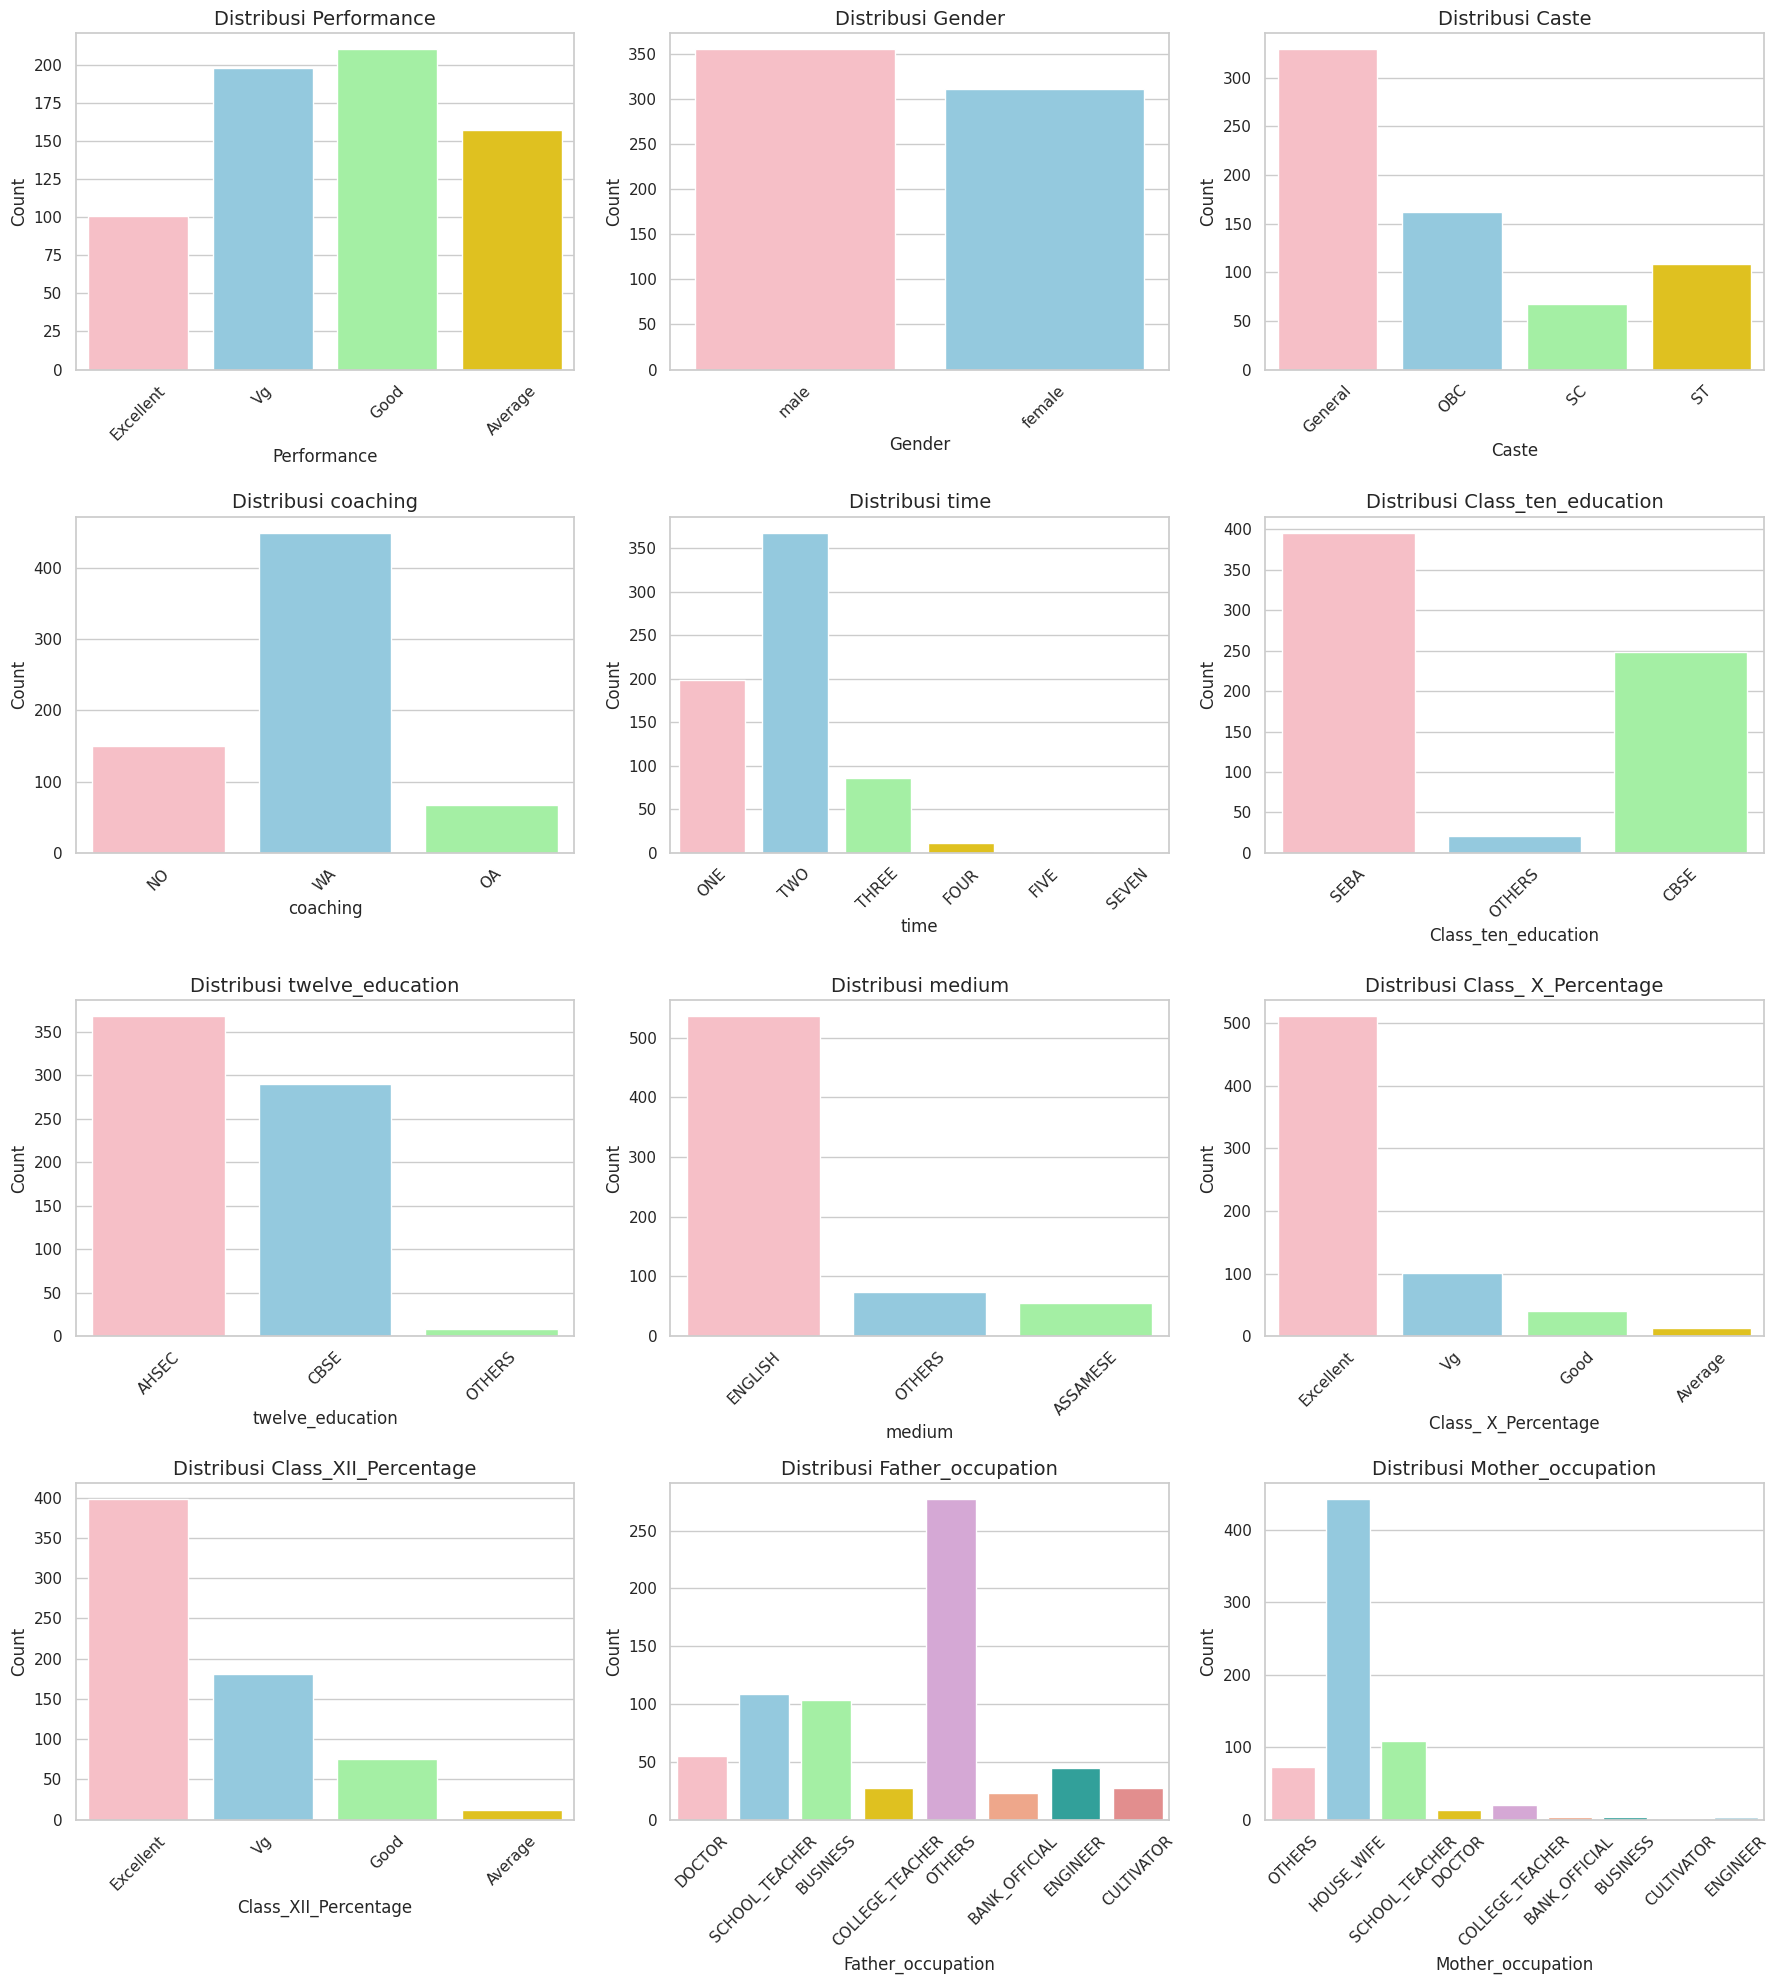

In [33]:
pastel_palette = ['#FFB6C1', '#87CEEB', '#98FB98', '#FFD700', '#DDA0DD', '#FFA07A', '#20B2AA', '#F08080', '#ADD8E6', '#90EE90']
categorical_features = df.select_dtypes(include=['object']).columns

num_plots = len(categorical_features)
rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)

fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i], palette=pastel_palette)
    axes[i].set_title(f'Distribusi {col}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [34]:
for col in df.columns:
    print(f"Frequency of categories in {col}:\n", df[col].value_counts())
    print("\n")

Frequency of categories in Performance:
 Performance
Good         210
Vg           198
Average      157
Excellent    101
Name: count, dtype: int64


Frequency of categories in Gender:
 Gender
male      355
female    311
Name: count, dtype: int64


Frequency of categories in Caste:
 Caste
General    329
OBC        162
ST         108
SC          67
Name: count, dtype: int64


Frequency of categories in coaching:
 coaching
WA    449
NO    150
OA     67
Name: count, dtype: int64


Frequency of categories in time:
 time
TWO      368
ONE      199
THREE     86
FOUR      11
FIVE       1
SEVEN      1
Name: count, dtype: int64


Frequency of categories in Class_ten_education:
 Class_ten_education
SEBA      396
CBSE      249
OTHERS     21
Name: count, dtype: int64


Frequency of categories in twelve_education:
 twelve_education
AHSEC     368
CBSE      290
OTHERS      8
Name: count, dtype: int64


Frequency of categories in medium:
 medium
ENGLISH     536
OTHERS       74
ASSAMESE     56
Name: coun

Performance  Average  Excellent  Good   Vg
Gender                                    
female            77         37   100   97
male              80         64   110  101


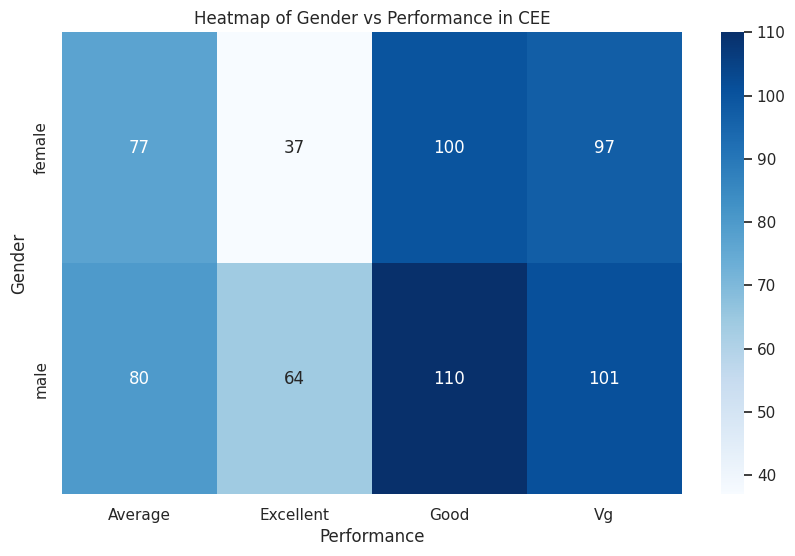

In [35]:
cross_tab = pd.crosstab(df['Gender'], df['Performance'])
print(cross_tab)

# Visualisasi heatmap dari crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Gender vs Performance in CEE')
plt.show()

In [36]:
df.columns

Index(['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'],
      dtype='object')

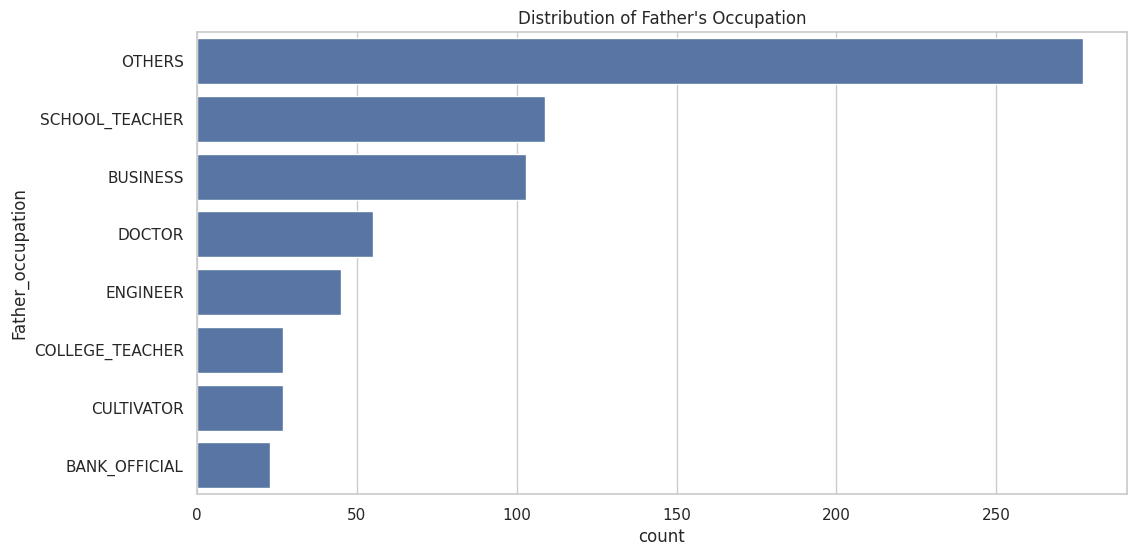

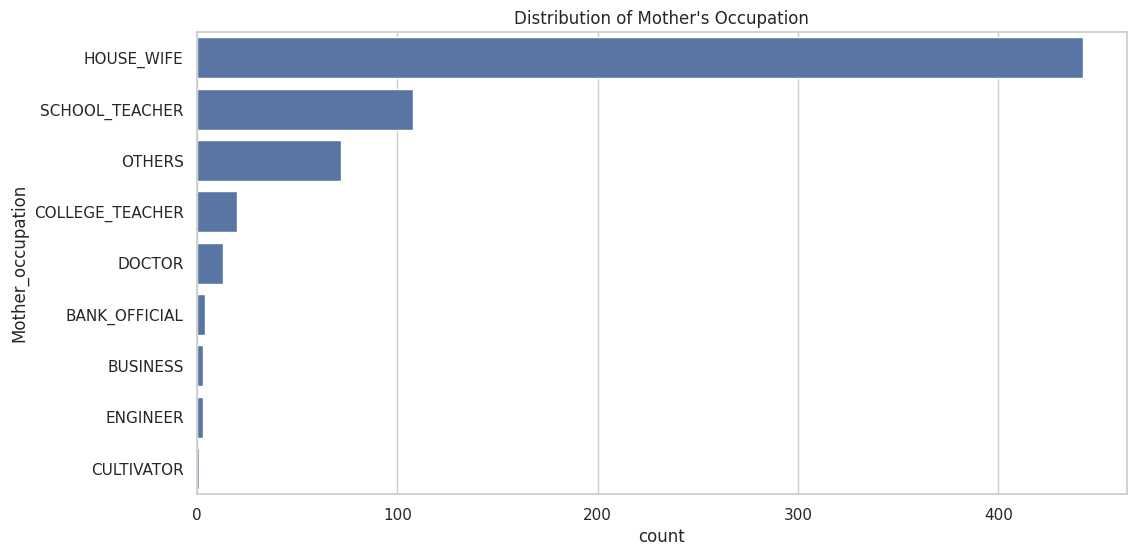

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Father_occupation'], order=df['Father_occupation'].value_counts().index)
plt.title('Distribution of Father\'s Occupation')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df['Mother_occupation'], order=df['Mother_occupation'].value_counts().index)
plt.title('Distribution of Mother\'s Occupation')
plt.show()

just categorical, coz there is no numeric type.

In [38]:
for col in categorical_features:
    freq = df[col].value_counts(normalize=True) * 100
    print(f"Persentase frekuensi untuk {col}:\n{freq}\n")

Persentase frekuensi untuk Performance:
Performance
Good         31.531532
Vg           29.729730
Average      23.573574
Excellent    15.165165
Name: proportion, dtype: float64

Persentase frekuensi untuk Gender:
Gender
male      53.303303
female    46.696697
Name: proportion, dtype: float64

Persentase frekuensi untuk Caste:
Caste
General    49.399399
OBC        24.324324
ST         16.216216
SC         10.060060
Name: proportion, dtype: float64

Persentase frekuensi untuk coaching:
coaching
WA    67.417417
NO    22.522523
OA    10.060060
Name: proportion, dtype: float64

Persentase frekuensi untuk time:
time
TWO      55.255255
ONE      29.879880
THREE    12.912913
FOUR      1.651652
FIVE      0.150150
SEVEN     0.150150
Name: proportion, dtype: float64

Persentase frekuensi untuk Class_ten_education:
Class_ten_education
SEBA      59.459459
CBSE      37.387387
OTHERS     3.153153
Name: proportion, dtype: float64

Persentase frekuensi untuk twelve_education:
twelve_education
AHSEC     

In [39]:
from scipy.stats import entropy

for col in categorical_features:
    freq = df[col].value_counts(normalize=True)
    ent = entropy(freq)
    print(f"Entropy untuk {col}: {ent:.4f}")

Entropy untuk Performance: 1.3512
Entropy untuk Gender: 0.6910
Entropy untuk Caste: 1.2183
Entropy untuk coaching: 0.8326
Entropy untuk time: 1.0403
Entropy untuk Class_ten_education: 0.7859
Entropy untuk twelve_education: 0.7429
Entropy untuk medium: 0.6271
Entropy untuk Class_ X_Percentage: 0.7378
Entropy untuk Class_XII_Percentage: 0.9800
Entropy untuk Father_occupation: 1.7139
Entropy untuk Mother_occupation: 1.0788


In [40]:
combination = df.groupby(['Gender', 'Caste']).size().reset_index(name='Count')
rare_combinations = combination[combination['Count'] < 5]  # Kombinasi yang muncul kurang dari 5 kali
print("Kombinasi kategori yang jarang muncul:\n", rare_combinations)

Kombinasi kategori yang jarang muncul:
 Empty DataFrame
Columns: [Gender, Caste, Count]
Index: []


In [41]:
def handle_rare_categories(df, column, threshold=0.01):
    # Hitung frekuensi kategori
    freq = df[column].value_counts(normalize=True)
    # Identifikasi kategori yang jarang muncul
    rare_categories = freq[freq < threshold].index
    # Ganti kategori yang jarang muncul dengan "OTHERS"
    df[column] = df[column].replace(rare_categories, 'OTHERS')
    return df

categorical_columns = ['time', 'Class_ten_education', 'twelve_education', 'Father_occupation', 'Mother_occupation']

for col in categorical_columns:
    df = handle_rare_categories(df, col, threshold=0.01)

for col in categorical_columns:
    print(f"Distribusi setelah handling outlier untuk {col}:\n{df[col].value_counts(normalize=True)}\n")

Distribusi setelah handling outlier untuk time:
time
TWO       0.552553
ONE       0.298799
THREE     0.129129
FOUR      0.016517
OTHERS    0.003003
Name: proportion, dtype: float64

Distribusi setelah handling outlier untuk Class_ten_education:
Class_ten_education
SEBA      0.594595
CBSE      0.373874
OTHERS    0.031532
Name: proportion, dtype: float64

Distribusi setelah handling outlier untuk twelve_education:
twelve_education
AHSEC     0.552553
CBSE      0.435435
OTHERS    0.012012
Name: proportion, dtype: float64

Distribusi setelah handling outlier untuk Father_occupation:
Father_occupation
OTHERS             0.415916
SCHOOL_TEACHER     0.163664
BUSINESS           0.154655
DOCTOR             0.082583
ENGINEER           0.067568
COLLEGE_TEACHER    0.040541
CULTIVATOR         0.040541
BANK_OFFICIAL      0.034535
Name: proportion, dtype: float64

Distribusi setelah handling outlier untuk Mother_occupation:
Mother_occupation
HOUSE_WIFE         0.663664
SCHOOL_TEACHER     0.162162
OTHE

preprocessing

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,1,1,0,0,1,2,0,1,1,1,4,3
1,1,1,1,2,4,2,0,2,1,1,7,2
2,1,1,1,1,4,1,1,1,1,1,1,2
3,1,1,0,2,1,2,0,2,1,1,7,4
4,1,1,0,1,4,2,1,1,1,1,2,2


In [43]:
#scaler = StandardScaler()
#numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
#df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [44]:
#df['Performance'] = df['Performance'].astype('category').cat.codes

In [45]:
#X = df.drop('Performance', axis=1)
#y = df['Performance']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelling

=======================

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd


X = df.drop(columns=['Performance'])
y = df['Performance']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test), multi_class='ovr'))

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gb))
print("AUC-ROC for Gradient Boosting:", roc_auc_score(y_test, gb_model.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        38
           1       0.76      0.63      0.69        49
           2       0.47      0.45      0.46        44
           3       0.43      0.51      0.47        37

    accuracy                           0.61       168
   macro avg       0.61      0.61      0.61       168
weighted avg       0.62      0.61      0.61       168

AUC-ROC: 0.815949522434246
Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81        38
           1       0.68      0.65      0.67        49
           2       0.41      0.30      0.34        44
           3       0.30      0.38      0.34        37

    accuracy                           0.55       168
   macro avg       0.54      0.55      0.54       168
weighted avg       0.55      0.55      0.54       168

AUC-ROC for Gradient Boosting: 0.8128591998472533
